Importing Required Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from google.colab import files
from IPython.display import Image

Uploading Image

In [2]:
uploaded = files.upload()

Saving jigsaw.jpg to jigsaw.jpg


Reading the Image

(421, 797, 3)


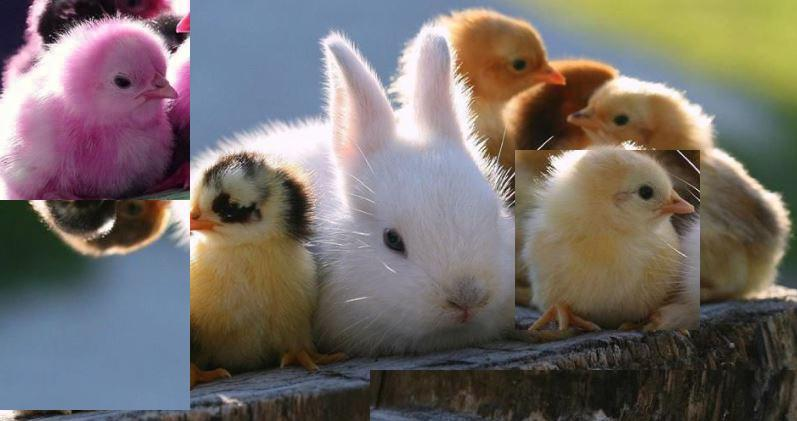

In [3]:
url="jigsaw.jpg"
image=cv.imread(url)
print(image.shape)
cv2_imshow(image)

Cropping different parts

In [4]:
#1st
cropped1=image[0:200, 0:190]
# cv2_imshow(cropped1)


#2nd
cropped2=image[200:399, 0:189]
# cv2_imshow(cropped2)

# rotating cropped2 about center
def rotate(img, angle, rotPoint=None):
  (height,width)=img.shape[:2]
  if rotPoint is None:
    rotPoint=(width//2, height//2)

  rotMat=cv.getRotationMatrix2D(rotPoint,angle,1.0)
  dimensions=(width,height)
  return cv.warpAffine(img,rotMat,dimensions)

cropped2rot=rotate(cropped2, 180)
cropped2flip=cv.flip(cropped2rot, 1)
final2=cropped2flip[1:200, 0:189]
# cv2_imshow(cropped2flip)
# cv2_imshow(final2)
#Resizing for better smoothness
ff2=cv.resize(final2, (192, 208))
# cv2_imshow(ff2)


#3rd
cropped3=image[150:330, 515:700]
# cv2_imshow(cropped3)

#Flipping cropped3 horizontally
cropped3flip=cv.flip(cropped3, 1)
# cv2_imshow(cropped3flip)


#4th
cropped4=image[370:421, 370:797]
# cv2_imshow(cropped4)
cropped4flip=cv.flip(cropped4, 0)
# cv2_imshow(cropped4flip)

Placing the modified parts in the main image

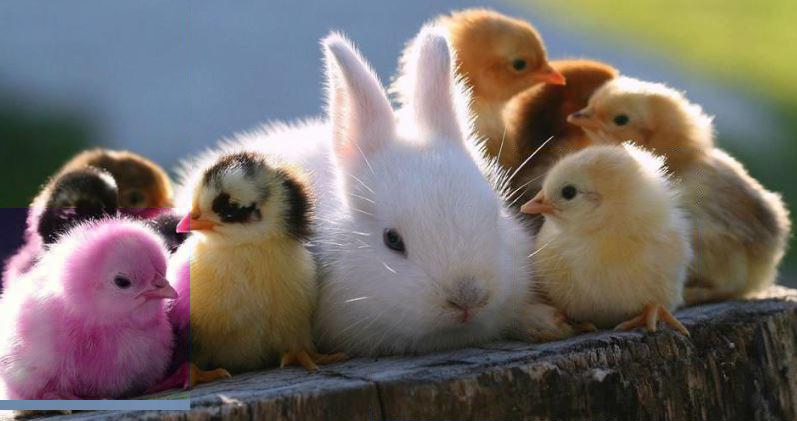

In [5]:
image[150:330, 515:700]=cropped3flip
image[370:421, 370:797]=cropped4flip
image[200:400, 0:190]=cropped1
image[0:208, 0:192]=ff2
cv2_imshow(image)